# Taylor Swidt in Spotify

This project will focus on classification task to predict whether the artist is Taylor Swift or not based on several dimensions.

Original Source of dataset: https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021

## Motivation

Spotify is the most popular streaming service for commercial music. Because Spotify offers both free and premium accounts, it has attracted 489 million across over 180 regions all over the world. The large user population can serve as a representation of the current music trends. All our group members are currently using Spotify and we'd like to explore this Spotify dataset to explore what kinds of factors can influence a song's ability to be in the top 200 weekly global chart on Spotify.

### Reference

Ruby, Daniel. “Spotify Stats 2023 - (Latest Facts, Data, Infographics).” Demand Sage, 23 Feb. 2023, https://www.demandsage.com/spotify-stats/#:~:text=Spotify%20is%20the%20world's%20leading,premium%20subscribers%20across%20180%20regions.

## Limitations

- The original dataset includes songs with up to 11 genres. Because there are many niche genres and many songs have more than one genre. This makes our predictions less accurate
- Some observations were lost after cleaning our dataset because they contained null values.
- Some variables that we would like add that would lead to interesting insights are:
> - Number of likes of a song
> - Country that song is most streamed in
> - Primary language of lyrics

## Data Preparation

### Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLarsIC, LogisticRegression

### Read-in

In [2]:
df_raw = pd.read_csv('spotify_top_200_sample.csv')
df_raw.head(6)

,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting,Week_of_Highest_Charting_year,Week_of_Highest_Charting_month,Week_of_Highest_Charting_day,Song_Name,Streams,Artist,Artist_Followers,...,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7,Genre_8,Genre_9,Genre_10,Genre_11
0,8,24,4/2/2021,2021,4,2,Heartbreak Anniversary,8832945,Giveon,1398563,...,r&b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92,2,5/15/2020,2020,5,15,X (with KAROL G),5018592,Jonas Brothers,5436999,...,dance pop,pop,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,181,1,12/18/2020,2020,12,18,Christmas Tree Farm,6657404,Taylor Swift,42227614,...,post-teen pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,29,11/27/2020,2020,11,27,TE MUDASTE,5242347,Bad Bunny,36142273,...,reggaeton,trap latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32,10,1/3/2020,2020,1,3,Futsal Shuffle 2020,5386512,Lil Uzi Vert,11821805,...,philly rap,rap,trap,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,109,1,2/21/2020,2020,2,21,Interlude : Shadow,6655856,BTS,37151476,...,k-pop boy group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Checking Data

In [3]:
df_raw.dtypes

Highest_Charting_Position           int64
Number_of_Times_Charted             int64
Week_of_Highest_Charting           object
Week_of_Highest_Charting_year       int64
Week_of_Highest_Charting_month      int64
Week_of_Highest_Charting_day        int64
Song_Name                          object
Streams                             int64
Artist                             object
Artist_Followers                   object
Song_ID                            object
Release_Date                       object
Release_Date_year                 float64
Release_Date_month                 object
Release_Date_day                  float64
Weeks_Charted                      object
Weeks_Charted_year                  int64
Weeks_Charted_month                 int64
Weeks_Charted_day                   int64
Popularity                         object
Danceability                       object
Energy                             object
Loudness                           object
Speechiness                       

In [4]:
#dropped excess genre columns and string column
df_uncleaned = df_raw.drop(['Genre_2', 'Genre_3', 'Genre_4', 'Genre_5', 'Genre_6', 'Genre_7', 'Genre_8', 'Genre_9', 'Genre_10', 'Genre_11', 'Week_of_Highest_Charting', 'Song_Name', 'Weeks_Charted', 'Song_ID'], axis=1)
df_uncleaned

,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting_year,Week_of_Highest_Charting_month,Week_of_Highest_Charting_day,Streams,Artist,Artist_Followers,Release_Date,Release_Date_year,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_ms,Valence,Chord,Genre_1
0,8,24,2021,4,2,8832945,Giveon,1398563,3/27/2020,2020.0,...,0.465,-8.964,0.079,0.524,0.303,89.087,198371,0.543,C,pop
1,92,2,2020,5,15,5018592,Jonas Brothers,5436999,5/15/2020,2020.0,...,0.827,-5.09,0.062,0.049,0.321,117.977,185277,0.75,E,boy band
2,181,1,2020,12,18,6657404,Taylor Swift,42227614,12/6/2019,2019.0,...,0.68,-4.505,0.033,0.06,0.324,134.002,228027,0.437,G,pop
3,12,29,2020,11,27,5242347,Bad Bunny,36142273,11/27/2020,2020.0,...,0.637,-4.835,0.059,0.234,0.118,92.025,130014,0.471,A#/Bb,latin
4,32,10,2020,1,3,5386512,Lil Uzi Vert,11821805,12/12/2019,2019.0,...,0.457,-8.191,0.156,0.033,0.231,136.97,198913,0.296,G,melodic rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,30,9,2020,4,10,4252898,Twenty One Pilots,20829526,4/9/2020,2020.0,...,0.583,-7.34,0.043,0.32,0.144,122.012,220051,0.77,E,modern rock
496,29,15,2020,1,24,5234645,Ali Gatie,1758300,3/26/2021,2021.0,...,0.366,-11.144,0.115,0.63,0.055,84.394,193668,0.229,G,canadian hip hop
497,193,1,2021,2,12,4902737,Oasis,6478565,1995,NaN,...,0.893,-4.097,0.041,0.001,0.187,174.323,258773,0.434,D,beatlesque
498,6,7,2020,12,18,15424001,Michael Bublé,4702232,11/9/2012,2012.0,...,0.214,-11.714,0.038,0.908,0.341,94.775,206640,0.363,E,adult standards


In [5]:
df_uncleaned.dtypes

Highest_Charting_Position           int64
Number_of_Times_Charted             int64
Week_of_Highest_Charting_year       int64
Week_of_Highest_Charting_month      int64
Week_of_Highest_Charting_day        int64
Streams                             int64
Artist                             object
Artist_Followers                   object
Release_Date                       object
Release_Date_year                 float64
Release_Date_month                 object
Release_Date_day                  float64
Weeks_Charted_year                  int64
Weeks_Charted_month                 int64
Weeks_Charted_day                   int64
Popularity                         object
Danceability                       object
Energy                             object
Loudness                           object
Speechiness                        object
Acousticness                       object
Liveness                           object
Tempo                              object
Duration_ms                       

In [6]:
df_uncleaned.to_csv(r'spotify_removedRows.csv', index=False)

In [7]:
df_uncleaned['Energy'].unique()

array(['0.465', '0.827', '0.68', '0.637', '0.457', '0.798', '0.492',
       '0.586', '0.579', '0.703', '0.948', '0.512', '0.608', '0.574',
       '0.483', '0.436', '0.646', '0.617', '0.789', '0.783', '0.377',
       '0.737', '0.425', '0.797', '0.793', '0.939', '0.664', '0.576',
       '0.802', '0.676', '0.72', '0.543', '0.599', '0.541', '0.631',
       '0.677', '0.826', '0.887', '0.434', '0.462', '0.616', '0.509',
       '0.899', '0.546', '0.445', '0.446', '0.437', '0.594', '0.502',
       '0.597', 'missing', '0.764', '0.609', '0.128', '0.239', '0.863',
       '0.513', '0.497', '0.913', '0.534', '0.761', '0.829', '0.674',
       '0.413', '0.571', '0.652', '0.267', '0.776', '0.605', '0.836',
       '0.669', '0.511', '0.648', '0.729', '0.538', '0.741', '0.662',
       '0.603', '0.681', '0.545', '0.892', '0.801', '0.707', '0.52',
       '0.738', '0.629', '0.706', '0.812', '0.398', '0.533', '0.553',
       '0.396', '0.904', '0.714', '0.455', '0.698', '0.485', '0.473',
       '0.5', '0.556'

### Data Cleaning

In [8]:
# missing values are encoded as nan
missing = ['missing']

df = pd.read_csv("spotify_removedRows.csv", na_values = missing)
df = df.dropna()
df

,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting_year,Week_of_Highest_Charting_month,Week_of_Highest_Charting_day,Streams,Artist,Artist_Followers,Release_Date,Release_Date_year,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_ms,Valence,Chord,Genre_1
0,8,24,2021,4,2,8832945,Giveon,1398563.0,3/27/2020,2020.0,...,0.465,-8.964,0.079,0.524,0.303,89.087,198371.0,0.543,C,pop
1,92,2,2020,5,15,5018592,Jonas Brothers,5436999.0,5/15/2020,2020.0,...,0.827,-5.090,0.062,0.049,0.321,117.977,185277.0,0.750,E,boy band
2,181,1,2020,12,18,6657404,Taylor Swift,42227614.0,12/6/2019,2019.0,...,0.680,-4.505,0.033,0.060,0.324,134.002,228027.0,0.437,G,pop
3,12,29,2020,11,27,5242347,Bad Bunny,36142273.0,11/27/2020,2020.0,...,0.637,-4.835,0.059,0.234,0.118,92.025,130014.0,0.471,A#/Bb,latin
4,32,10,2020,1,3,5386512,Lil Uzi Vert,11821805.0,12/12/2019,2019.0,...,0.457,-8.191,0.156,0.033,0.231,136.970,198913.0,0.296,G,melodic rap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,4,76,2020,6,19,5238547,"Powfu, beabadoobee",924083.0,2/8/2020,2020.0,...,0.431,-8.765,0.135,0.731,0.696,144.026,173333.0,0.348,G#/Ab,sad rap
495,30,9,2020,4,10,4252898,Twenty One Pilots,20829526.0,4/9/2020,2020.0,...,0.583,-7.340,0.043,0.320,0.144,122.012,220051.0,0.770,E,modern rock
496,29,15,2020,1,24,5234645,Ali Gatie,1758300.0,3/26/2021,2021.0,...,0.366,-11.144,0.115,0.630,0.055,84.394,193668.0,0.229,G,canadian hip hop
498,6,7,2020,12,18,15424001,Michael Bublé,4702232.0,11/9/2012,2012.0,...,0.214,-11.714,0.038,0.908,0.341,94.775,206640.0,0.363,E,adult standards


In [9]:
df.dtypes

Highest_Charting_Position           int64
Number_of_Times_Charted             int64
Week_of_Highest_Charting_year       int64
Week_of_Highest_Charting_month      int64
Week_of_Highest_Charting_day        int64
Streams                             int64
Artist                             object
Artist_Followers                  float64
Release_Date                       object
Release_Date_year                 float64
Release_Date_month                 object
Release_Date_day                  float64
Weeks_Charted_year                  int64
Weeks_Charted_month                 int64
Weeks_Charted_day                   int64
Popularity                        float64
Danceability                      float64
Energy                            float64
Loudness                          float64
Speechiness                       float64
Acousticness                      float64
Liveness                          float64
Tempo                             float64
Duration_ms                       

In [10]:
# transform Month into int to make it consistent with other columns
df['Release_Date_month'] = df['Release_Date_month'].astype('Int64')

In [11]:
df.dtypes

Highest_Charting_Position           int64
Number_of_Times_Charted             int64
Week_of_Highest_Charting_year       int64
Week_of_Highest_Charting_month      int64
Week_of_Highest_Charting_day        int64
Streams                             int64
Artist                             object
Artist_Followers                  float64
Release_Date                       object
Release_Date_year                 float64
Release_Date_month                  Int64
Release_Date_day                  float64
Weeks_Charted_year                  int64
Weeks_Charted_month                 int64
Weeks_Charted_day                   int64
Popularity                        float64
Danceability                      float64
Energy                            float64
Loudness                          float64
Speechiness                       float64
Acousticness                      float64
Liveness                          float64
Tempo                             float64
Duration_ms                       

## Logistic Research

### Encode the labels

In [12]:
# into 1/0
df_taylor = df[df['Artist'] == 'Taylor Swift']
df_taylor['y'] = 1
df_nottaylor = df[df['Artist'] != 'Taylor Swift']
df_nottaylor['y'] = 0
dfl = pd.concat([df_taylor, df_nottaylor])

# drop artist predictor column
dfl.drop(['Artist'], axis = 1)
dfl.head()

/var/folders/zr/5gt0j9qx40115l912wkkz6g00000gn/T/ipykernel_54798/3066312245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taylor['y'] = 1
/var/folders/zr/5gt0j9qx40115l912wkkz6g00000gn/T/ipykernel_54798/3066312245.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nottaylor['y'] = 0


,Highest_Charting_Position,Number_of_Times_Charted,Week_of_Highest_Charting_year,Week_of_Highest_Charting_month,Week_of_Highest_Charting_day,Streams,Artist,Artist_Followers,Release_Date,Release_Date_year,...,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration_ms,Valence,Chord,Genre_1,y
2,181,1,2020,12,18,6657404,Taylor Swift,42227614.0,12/6/2019,2019.0,...,-4.505,0.033,0.060,0.324,134.002,228027.0,0.437,G,pop,1
20,24,3,2020,7,24,5112180,Taylor Swift,42227614.0,7/24/2020,2020.0,...,-8.761,0.025,0.600,0.098,95.939,294521.0,0.502,C,pop,1
40,22,2,2020,12,11,8115520,Taylor Swift,42227614.0,12/11/2020,2020.0,...,-8.193,0.031,0.735,0.105,145.916,229840.0,0.348,F,pop,1
73,13,3,2020,7,24,5564072,Taylor Swift,42227614.0,7/24/2020,2020.0,...,-10.037,0.033,0.687,0.059,110.107,208978.0,0.379,D,pop,1
89,199,1,2019,12,27,4595450,Taylor Swift,42227614.0,11/13/2019,2019.0,...,-7.176,0.064,0.433,0.086,205.272,221307.0,0.422,G,pop,1


In [13]:
#dimensions
print(f'there are {dfl.shape[0]} rows and {dfl.shape[1]} columns')

there are 467 rows and 28 columns


### Pick Initial Predictors

In [14]:
# filter 5 initial predictors

predictors = dfl[['Popularity', 'Streams', 'Artist_Followers', 'Speechiness', 'Chord', 'y']]
predictors= pd.get_dummies(predictors, drop_first = True)
predictors

,Popularity,Streams,Artist_Followers,Speechiness,y,Chord_A#/Bb,Chord_B,Chord_C,Chord_C#/Db,Chord_D,Chord_D#/Eb,Chord_E,Chord_F,Chord_F#/Gb,Chord_G,Chord_G#/Ab
2,52.0,6657404,42227614.0,0.033,1,0,0,0,0,0,0,0,0,0,1,0
20,71.0,5112180,42227614.0,0.025,1,0,0,1,0,0,0,0,0,0,0,0
40,66.0,8115520,42227614.0,0.031,1,0,0,0,0,0,0,0,1,0,0,0
73,70.0,5564072,42227614.0,0.033,1,0,0,0,0,1,0,0,0,0,0,0
89,70.0,4595450,42227614.0,0.064,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85.0,5238547,924083.0,0.135,0,0,0,0,0,0,0,0,0,0,0,1
495,72.0,4252898,20829526.0,0.043,0,0,0,0,0,0,0,1,0,0,0,0
496,69.0,5234645,1758300.0,0.115,0,0,0,0,0,0,0,0,0,0,1,0
498,55.0,15424001,4702232.0,0.038,0,0,0,0,0,0,0,1,0,0,0,0


### Train-test split

In [15]:
df_train, df_test = train_test_split(predictors, test_size = 0.25, random_state = 428)

In [16]:
#confirm df_train
len(df_train)/len(df)

0.7494646680942184

In [17]:
df_train['y'].value_counts()

0    337
1     13
Name: y, dtype: int64

In [18]:
#confirm df_test
len(df_test)/len(df)

0.2505353319057816

In [19]:
df_test['y'].value_counts()

0    113
1      4
Name: y, dtype: int64

### Note

- As the above cell listed, the percentage of the singer **is** Taylor Swift is relatively small in both train and test datasets.
- However, the percentage of the singer **is** Taylor Swift is almost the same for train and test datasets (~3%). Therefore, I decided to continue research on the classification task.

### LASSO Suggestions

In [21]:
#find hyperparameter

lamda = [1/20, 1/15, 1/10, 1/5, 1/2]

v_train, val = train_test_split(df_train, test_size = 0.25, random_state = 428)

x_col = ['Popularity',
 'Streams',
 'Artist_Followers',
 'Speechiness',
 'Chord_A#/Bb',
 'Chord_B',
 'Chord_C',
 'Chord_C#/Db',
 'Chord_D',
 'Chord_D#/Eb',
 'Chord_E',
 'Chord_F',
 'Chord_F#/Gb',
 'Chord_G',
 'Chord_G#/Ab']

X_vtrain = v_train[x_col]
y_vtrain = v_train['y']

X_val = val[x_col]
y_val = val['y']

lasso_vrmse = []

for i in range(len(lamda)):
    lasso_model = Lasso(alpha = lamda[i])
    lasso_model.fit(X_vtrain, y_vtrain)
    lasso_vrmse.append(mean_squared_error(y_val, lasso_model.predict(X_val), squared = False))

print('The alpha for the lowest validation rmse for lasso model is', lamda[np.argmin(lasso_vrmse)], 'with rmse of', min(lasso_vrmse))

The alpha for the lowest validation rmse for lasso model is 0.05 with rmse of 0.1746689318326312


### Refit the model with best lamda

In [22]:
X_train = df_train[x_col]
y_train = df_train['y']

best_lasso = Lasso(alpha = 0.05)
best_lasso.fit(X_train, y_train)

Lasso(alpha=0.05)

In [23]:
lcoef = pd.DataFrame(best_lasso.coef_.T, columns = ['LASSO20'], index = x_col)
lcoef

,LASSO20
Popularity,-1.167441e-03
Streams,3.249387e-09
Artist_Followers,2.994108e-09
Speechiness,-0.000000e+00
Chord_A#/Bb,0.000000e+00
Chord_B,0.000000e+00
Chord_C,0.000000e+00
Chord_C#/Db,-0.000000e+00
Chord_D,-0.000000e+00
Chord_D#/Eb,-0.000000e+00


In [24]:
print('Suggest by two LASSO models, the predictors that are most likely to be removed are Speechiness and Chord.')

Suggest by two LASSO models, the predictors that are most likely to be removed are Speechiness and Chord.


### Ridge Suggestion

In [25]:
ridge_vrmse = []

for i in range(len(lamda)):
    ridge_model = Ridge(alpha = lamda[i])
    ridge_model.fit(X_vtrain, y_vtrain)
    ridge_vrmse.append(mean_squared_error(y_val, ridge_model.predict(X_val), squared = False))

print('The alpha for the lowest validation rmse for ridge model is', lamda[np.argmin(ridge_vrmse)], 'with rmse of', min(ridge_vrmse))

The alpha for the lowest validation rmse for ridge model is 0.5 with rmse of 0.17710537902016266


/Users/wjt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.69681e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/wjt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.71347e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/wjt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.74681e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/wjt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.8472e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/wjt/opt/anaconda3/lib/python3.

In [26]:
best_ridge = Ridge(alpha = 0.5)
best_ridge.fit(X_train, y_train)

/Users/wjt/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.9056e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.5)

In [27]:
rcoef = pd.DataFrame(best_ridge.coef_.T, columns = ['RIDGE05'], index = x_col)
rcoef

,RIDGE05
Popularity,-1.884324e-03
Streams,3.818640e-09
Artist_Followers,2.856522e-09
Speechiness,-1.623343e-01
Chord_A#/Bb,2.310657e-02
Chord_B,2.666949e-02
Chord_C,8.023833e-03
Chord_C#/Db,-2.545216e-02
Chord_D,-1.701742e-02
Chord_D#/Eb,-4.224526e-02


- Suggest by two Ridge models, the predictors that are most likely to be removed are Stream and Artist_follower. 
- However, this might now be reliable because the Chord has a lot of subcolumn that may drag the coefficient away so I decided to go with Lasso
- I will perform backwoard elimination in the next step to confirm this information.

### Backward Elimination

In [30]:
#start of the backward elimination using BIC
#no predictor removed
current_mod=smf.logit('y ~ Popularity + Streams+ Artist_Followers + Chord + Speechiness', data=df_train).fit()
print('Adjusted BIC of the Current Model',current_mod.bic)

         Current function value: 0.099967
         Iterations: 35
Adjusted BIC of the Current Model 163.7038857884545


/Users/wjt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [31]:
#remove Popularity
test1_mod=smf.logit('y ~ Streams+ Artist_Followers + Chord + Speechiness', data=df_train).fit()
print('the BIC of the Current Model',test1_mod.bic)

         Current function value: 0.103595
         Iterations: 35
the BIC of the Current Model 160.38548376490328


/Users/wjt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [32]:
#remove Streams
test2_mod=smf.logit('y ~ Popularity + Artist_Followers + Chord + Speechiness', data=df_train).fit()
print('the BIC of the Current Model',test2_mod.bic)

         Current function value: 0.100284
         Iterations: 35
the BIC of the Current Model 158.06775264187579


/Users/wjt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
#remove Artist_Followers
test3_mod=smf.logit('y ~ Popularity + Streams+ Chord + Speechiness', data=df_train).fit()
print('the BIC of the Current Model',test3_mod.bic)

         Current function value: 0.128741
         Iterations: 35
the BIC of the Current Model 177.98754262570765


/Users/wjt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
#remove Chord
test4_mod=smf.logit('y ~ Popularity + Streams+ Artist_Followers + Speechiness', data=df_train).fit()
print('the BIC of the Current Model',test4_mod.bic)

Optimization terminated successfully.
         Current function value: 0.112624
         Iterations 10
the BIC of the Current Model 108.12655804070566


In [35]:
#remove speechiness
test5_mod=smf.logit('y ~ Popularity + Streams+ Artist_Followers + Chord', data=df_train).fit()
print('the BIC of the Current Model',test5_mod.bic)

         Current function value: 0.111996
         Iterations: 35
the BIC of the Current Model 166.26609433353002


/Users/wjt/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
print('the first predictor that is removed is Chord, the BIC for this model is 108.126')

the first predictor that is removed is Chord, the BIC for this model is 108.126


In [37]:
#remove chord + popularity
test6_mod=smf.logit('y ~ Streams+ Artist_Followers + Speechiness', data=df_train).fit()
print('the BIC of the Current Model',test6_mod.bic)

Optimization terminated successfully.
         Current function value: 0.118898
         Iterations 10
the BIC of the Current Model 106.66049345364193


In [38]:
#remove chord + stream
test7_mod=smf.logit('y ~ Popularity+ Artist_Followers + Speechiness', data=df_train).fit()
print('the BIC of the Current Model',test7_mod.bic)

Optimization terminated successfully.
         Current function value: 0.113516
         Iterations 10
the BIC of the Current Model 102.89325752906673


In [39]:
#remove chord + artist_followers
test8_mod=smf.logit('y ~ Streams+ Popularity + Speechiness', data=df_train).fit()
print('the BIC of the Current Model',test8_mod.bic)

Optimization terminated successfully.
         Current function value: 0.142780
         Iterations 10
the BIC of the Current Model 123.37792828515909


In [40]:
#remove chrod + Speechiness
test9_mod=smf.logit('y ~ Streams+ Popularity + Artist_Followers', data=df_train).fit()
print('the BIC of the Current Model',test9_mod.bic)

Optimization terminated successfully.
         Current function value: 0.122947
         Iterations 9
the BIC of the Current Model 109.49481640981794


In [41]:
print('the second predictor that is removed is Stream, the BIC for that model is 102.89')

the second predictor that is removed is Stream, the BIC for that model is 102.89


In [42]:
#remove chord + stream + popularity
test10_mod=smf.logit('y ~ Artist_Followers + Speechiness', data=df_train).fit()
print('the BIC of the Current Model',test10_mod.bic)

Optimization terminated successfully.
         Current function value: 0.119709
         Iterations 10
the BIC of the Current Model 101.36992295116823


In [43]:
#remove chord + stream + artist_followers
test11_mod=smf.logit('y ~  Speechiness+ Popularity', data=df_train).fit()
print('the BIC of the Current Model',test11_mod.bic)

Optimization terminated successfully.
         Current function value: 0.144255
         Iterations 10
the BIC of the Current Model 118.55209757096318


In [44]:
#remove chord + stream + speechiness
test12_mod=smf.logit('y ~  Popularity+ Artist_Followers', data=df_train).fit()
print('the BIC of the Current Model',test12_mod.bic)

Optimization terminated successfully.
         Current function value: 0.124105
         Iterations 9
the BIC of the Current Model 104.44734813977553


In [45]:
print('For now, the model that has [Artist_follower + Speechiness] has the lowest BIC of 101.36992295116823')

For now, the model that has [Artist_follower + Speechiness] has the lowest BIC of 101.36992295116823


In [46]:
#remove chord + stream + popularity + artist_floowers
test13_mod=smf.logit('y ~ Speechiness', data=df_train).fit()
print('the BIC of the Current Model',test13_mod.bic)

Optimization terminated successfully.
         Current function value: 0.147369
         Iterations 10
the BIC of the Current Model 114.87405516773063


In [47]:
#remove chord + stream + popularity + Speechiness
test14_mod=smf.logit('y ~ Artist_Followers', data=df_train).fit()
print('the BIC of the Current Model',test14_mod.bic)

Optimization terminated successfully.
         Current function value: 0.128846
         Iterations 8
the BIC of the Current Model 101.90825216666956


In [48]:
print('the parsomonious model has the lowest BIC score of 101.37')
print('The parsimoneous model to predict whether the artist is Taylor Swift from this data is [Artist_follower + Speechiness]')

the parsomonious model has the lowest BIC score of 101.37
The parsimoneous model to predict whether the artist is Taylor Swift from this data is [Artist_follower + Speechiness]


### Checking Assumptions

1. Linear: the first predictor [Artist_Followers] shows an S curve on the lmplot, but the second predictor [Speechiness] does not show an S curve in the lmplot, so this condition is not met.

- undefined. Independence: sample size n < 10% of population N and this is a random sample (based on kaggle.com), so this condition is met
- undefined. No  (Multicollinearity: no collinearity is plausible since the correlation between two predictors is very weak. (either met/not met)

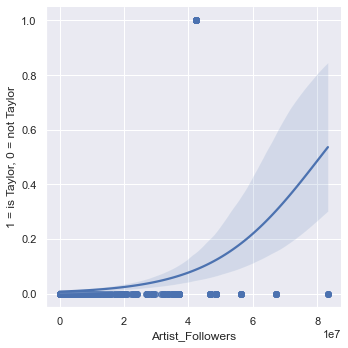

In [49]:
#1. Linear Assumption for quan predictor (1)
sns.lmplot(x = 'Artist_Followers', y = 'y', data = dfl, logistic = True)
plt.ylabel('1 = is Taylor, 0 = not Taylor')
plt.show()

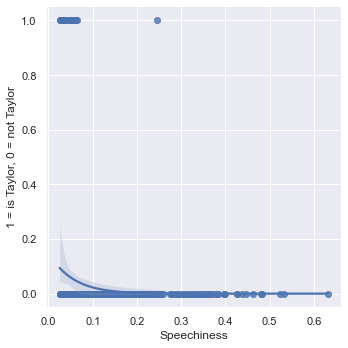

In [50]:
#1. Linear Assumption for quan predictor (2)
sns.lmplot(x = 'Speechiness', y = 'y', data = dfl, logistic = True)
plt.ylabel('1 = is Taylor, 0 = not Taylor')
plt.show()

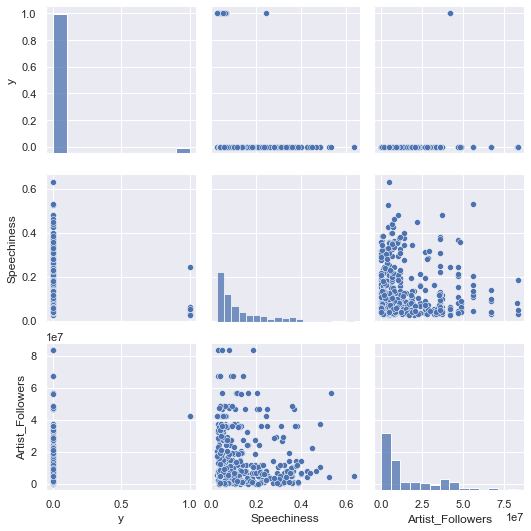

In [51]:
# 3. No Colinearity
dfl = dfl[['y', 'Speechiness', 'Artist_Followers']]
sns.pairplot(dfl)

### Best Model

In [52]:
best_mod = smf.logit('y ~ Artist_Followers + Speechiness', data=df_train).fit()
best_mod.summary()

Optimization terminated successfully.
         Current function value: 0.119709
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  350
Model:                          Logit   Df Residuals:                      347
Method:                           MLE   Df Model:                            2
Date:                Tue, 10 Oct 2023   Pseudo R-squ.:                  0.2460
Time:                        06:20:01   Log-Likelihood:                -41.898
converged:                       True   LL-Null:                       -55.564
Covariance Type:            nonrobust   LLR p-value:                 1.161e-06
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -3.8339      0.749     -5.120      0.000      -5.301      -2.366
Artist_Followers  6.066e-08   1.48e-08      4.101      0.000    3.17e-08    8.97e-08
Speechiness        -13.3199      7.255     -1.836      0.066     -27.540       0.900
====================================================================================
"""

In [53]:
#best logit regression --- log(phat/1-phat) = beta0 + beta1X
print('the expected log odds for the Artist is Taylor Swift is [-3.8339 + 6.066e-08*Artist_Followers-13.3199*Speechiness]')

the expected log odds for the Artist is Taylor Swift is [-3.8339 + 6.066e-08*Artist_Followers-13.3199*Speechiness]


### Non-Zero Slope (Coefficient Inferences)

- the significant level is 5% = 0.05
- using the result table above

In [54]:
#Hypothesis Test for the slope of [Artist_Followers] is non-zero
print('Ho: beta-artist_followers = 0; Ha: beta-artist_followers /= 0')
print('From the table above, we can see a p value that is close to 0, which means that we have efficient evidence to reject the null hypothesis')
print('Therefore, the slope of Artist_Followers in the population level is non-zero')

Ho: beta-artist_followers = 0; Ha: beta-artist_followers /= 0
From the table above, we can see a p value that is close to 0, which means that we have efficient evidence to reject the null hypothesis
Therefore, the slope of Artist_Followers in the population level is non-zero


In [55]:
#Hypothesis Test for the slope of [Speechiness] is non-zero
print('Ho: beta-Speechiness = 0; Ha: beta-Speechiness /= 0')
print('From the table above, we can see a p value that is close to 0.066 (p > alpha), which means that we do NOT have efficient evidence to reject the null hypothesis')
print('Therefore, the slope of Speechiness in the population level is zero')

Ho: beta-Speechiness = 0; Ha: beta-Speechiness /= 0
From the table above, we can see a p value that is close to 0.066 (p > alpha), which means that we do NOT have efficient evidence to reject the null hypothesis
Therefore, the slope of Speechiness in the population level is zero


### ROC & AUC

In [56]:
#plot fuction
def plot_roc(fpr, tpr,auc, lw = 2):
    plt.plot(fpr, tpr, color = 'darkorange', lw =lw,
              label = 'ROC curve (area = ' + str(round(auc, 3))+ ')')
    plt.plot([0,1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

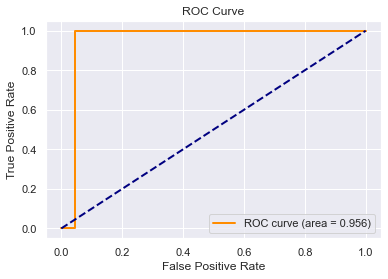

In [57]:
#roc curve for testing data
fpr_pew, tpr_pew, score_pew = roc_curve(y_true = df_test['y'], y_score = best_mod.predict(exog=df_test))
auc_pew = roc_auc_score(y_true = df_test['y'], y_score = best_mod.predict(exog=df_test))
plot_roc(fpr_pew, tpr_pew, auc_pew)

AUC conclusion
- Because the AUC is somewhat high (ie. closer to 1 [auc = 0.956]), this tells us that there does exist some predictive probability threshold that gets somewhat close to giving us the ideal scenario of a model with a false positive rate of 0 and a true positive rate of 1 with new data.

### Picking the Best Threshold

In [59]:
#threshold function
def tpr_fpr_thresh(y, pred_prob, thresh):
    yhat = 1*(pred_prob >= thresh)
    tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=yhat).ravel()
    tpr = tp / (fn + tp)
    fpr = fp / (fp + tn)
    return pd.DataFrame({'threshold':[thresh], 'tpr':[tpr], 'fpr':[fpr]})

In [60]:
for thresh in np.arange(0,1,.01):
    print(tpr_fpr_thresh(df_test['y'], best_mod.predict(exog=dict(df_test)), thresh))

   threshold  tpr  fpr
0        0.0  1.0  1.0
   threshold  tpr       fpr
0       0.01  1.0  0.522124
   threshold  tpr       fpr
0       0.02  1.0  0.300885
   threshold  tpr       fpr
0       0.03  1.0  0.230088
   threshold  tpr       fpr
0       0.04  1.0  0.185841
   threshold  tpr       fpr
0       0.05  1.0  0.150442
   threshold  tpr       fpr
0       0.06  1.0  0.150442
   threshold  tpr       fpr
0       0.07  1.0  0.132743
   threshold  tpr       fpr
0       0.08  1.0  0.123894
   threshold  tpr       fpr
0       0.09  1.0  0.088496
   threshold  tpr       fpr
0        0.1  1.0  0.061947
   threshold  tpr       fpr
0       0.11  1.0  0.044248
   threshold  tpr       fpr
0       0.12  1.0  0.044248
   threshold  tpr       fpr
0       0.13  1.0  0.044248
   threshold   tpr       fpr
0       0.14  0.75  0.044248
   threshold   tpr       fpr
0       0.15  0.75  0.044248
   threshold  tpr       fpr
0       0.16  0.5  0.044248
   threshold  tpr       fpr
0       0.17  0.0  0.04424

Threshold Result
- From the result of the threshold function above, we would use po = 0.12 as the threshold.
- This threshold give use a maximum true positive rate of 1.0 and the minimum false positive rate of 0.044248 which is close to an ideal threshold (tpr = 1, fpr = 0)

### Logistic Regression Discussion

In [61]:
df_taylor.shape


(17, 28)

In [63]:
df_nottaylor.shape

(450, 28)

- Based on the parsimonious model that we found (assuming all the assumptions are met), we can accurately predict if the Artist of the Spotify song is Taylor Swift based on the Speechiness and the number of followers that the artist has.
- Also, we found that po = 0.12 can provide us with a perfect true positive rate, that is, the predicted artist (Taylor Swift) is the true artist on Spotify with a low false positive rate of 0.044248.
- However, limitations do exist: the prediction is restricted to this dataset. Because of the limited amount of data, this prediction model cannot be applied well in the real world. Moreover, since two of the three assumptions are not met (Linearity + No Multicollinearity), the prediction from our logistic regression may not be valid.

## Summary

- Assuming the logistic assynptions are met, there is a linear reliationship between the log-odds of having Taylor Swift as the Spotify Artist in the top 200 glocal chart with two predictors that are speechiness and artist_followers. From our logistic regression research, we were able to predict if the Artist of a Spotify song on the top 200 weekly global chart is Taylor Swift based on the Speechiness and Artist_Followers. However, we have limited data and two of the three assumptions are not met (Linearity + No Multicollinearity), so the prediction from our logistic regression may not be valid.

## Future Work

This research was focused on determining what kinds of factors can influence the ability of a song to appear in the top 200 weekly global songs on Spotify for all years. Keeping the limitation that we have discussed in the first section in mind, we may conduct further research on analyzing how a correlation might strengthen or weaken over time since our dataset includes the date and week of the year that the song received its highest position on the top 200 list. Another question we may ask ourselves to conduct further research in is whether there is a stronger correlation between the number of streams and the genre of a song or between the number of streams and the danceability of a song.
